In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
single = pd.read_csv('./result-single.csv')

In [3]:
single

,alpha,rrt sampling,field width,field height,num mobiles,num statics,trial,uptime,elapsed time
0,0.0,500,600,600,20,0,#0,658173,0.115019
1,0.0,500,600,600,20,0,#1,654286,0.124882
2,0.0,500,600,600,20,0,#2,605511,0.180344
3,0.0,500,600,600,20,0,#3,677957,0.076384
4,0.0,500,600,600,20,0,#4,602328,0.179031
...,...,...,...,...,...,...,...,...,...
1195,0.0,500,600,600,40,40,#95,703380,0.800344
1196,0.0,500,600,600,40,40,#96,698129,0.611913
1197,0.0,500,600,600,40,40,#97,676398,0.649761
1198,0.0,500,600,600,40,40,#98,702911,0.856353


In [4]:
single_mean = single.drop(['alpha', 'trial'], axis=1).groupby(
  ['field width', 'field height', 'num mobiles', 'num statics'], as_index=False).mean()
single_mean

,field width,field height,num mobiles,num statics,rrt sampling,uptime,elapsed time
0,600,600,20,0,500.0,628362.00,0.140108
1,600,600,20,20,500.0,627893.20,0.140026
2,600,600,20,30,500.0,629634.89,0.144678
3,600,600,20,40,500.0,633426.53,0.136068
4,600,600,30,0,500.0,679170.86,0.324296
5,600,600,30,20,500.0,679363.45,0.325826
6,600,600,30,30,500.0,679183.56,0.341510
7,600,600,30,40,500.0,678808.14,0.334332
8,600,600,40,0,500.0,693306.39,0.680873
9,600,600,40,20,500.0,690743.39,0.641452


In [5]:
single_mean = single_mean.groupby(['field width', 'field height'])

In [6]:
single_mean600 = single_mean.get_group((600, 600))
single_mean600

,field width,field height,num mobiles,num statics,rrt sampling,uptime,elapsed time
0,600,600,20,0,500.0,628362.00,0.140108
1,600,600,20,20,500.0,627893.20,0.140026
2,600,600,20,30,500.0,629634.89,0.144678
3,600,600,20,40,500.0,633426.53,0.136068
4,600,600,30,0,500.0,679170.86,0.324296
5,600,600,30,20,500.0,679363.45,0.325826
6,600,600,30,30,500.0,679183.56,0.341510
7,600,600,30,40,500.0,678808.14,0.334332
8,600,600,40,0,500.0,693306.39,0.680873
9,600,600,40,20,500.0,690743.39,0.641452


In [7]:
num_sensors = single_mean600['num statics'] + single_mean600['num mobiles']
ratio_mobiles = single_mean600['num mobiles'] / num_sensors
single_mean600['num sensors'] = num_sensors
single_mean600['ratio of mobiles'] = ratio_mobiles

In [8]:
single_mean600

,field width,field height,num mobiles,num statics,rrt sampling,uptime,elapsed time,num sensors,ratio of mobiles
0,600,600,20,0,500.0,628362.00,0.140108,20,1.000000
1,600,600,20,20,500.0,627893.20,0.140026,40,0.500000
2,600,600,20,30,500.0,629634.89,0.144678,50,0.400000
3,600,600,20,40,500.0,633426.53,0.136068,60,0.333333
4,600,600,30,0,500.0,679170.86,0.324296,30,1.000000
5,600,600,30,20,500.0,679363.45,0.325826,50,0.600000
6,600,600,30,30,500.0,679183.56,0.341510,60,0.500000
7,600,600,30,40,500.0,678808.14,0.334332,70,0.428571
8,600,600,40,0,500.0,693306.39,0.680873,40,1.000000
9,600,600,40,20,500.0,690743.39,0.641452,60,0.666667


In [9]:
uptimes = single_mean600['uptime'].values.reshape((3, 4)) / 3600
uptimes

array([[174.545     , 174.41477778, 174.89858056, 175.95181389],
       [188.65857222, 188.71206944, 188.6621    , 188.55781667],
       [192.58510833, 191.87316389, 192.42791667, 192.41933333]])

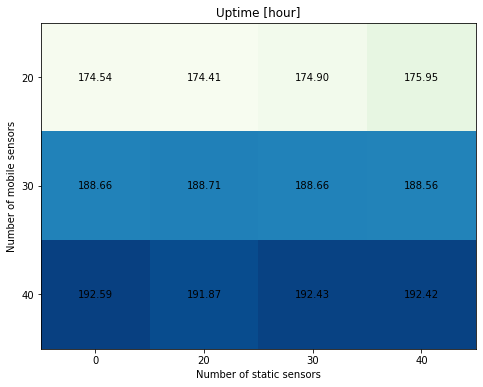

In [10]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.imshow(uptimes, cmap='GnBu')
ax.set_xticks(np.arange(uptimes.shape[1]))
ax.set_xticklabels(['0', '20', '30', '40'])
ax.set_yticks(np.arange(uptimes.shape[0]))
ax.set_yticklabels(['20', '30', '40'])
ax.set_xlabel('Number of static sensors')
ax.set_ylabel('Number of mobile sensors')
ax.set_title('Uptime [hour]')

for i in range(uptimes.shape[0]):
  for j in range(uptimes.shape[1]):
    ax.text(j, i, '{:.2f}'.format(uptimes[i][j]), ha='center', va='center', color='black')
plt.show()

In [11]:
def plot_uptimes(file):
  data = pd.read_csv(file)
  data = data[data['uptime'] > 0]
  data = data.drop(['trial'], axis=1).groupby(
    ['field width', 'field height', 'num mobiles', 'num statics'], as_index=False).mean()
  data = data.groupby(['field width', 'field height'], as_index=False).get_group((600, 600))
  uptimes = data['uptime'].values.reshape((3, 4)) / 3600
  num_mobiles= data['num mobiles'].values
  num_statics = data['num statics'].values

  fig = plt.figure(figsize=(8, 6))
  ax = fig.add_subplot(111)
  ax.imshow(uptimes, cmap='GnBu')
  ax.set_xticks(np.arange(uptimes.shape[1]))
  ax.set_xticklabels(['0', '20', '30', '40'])
  ax.set_yticks(np.arange(uptimes.shape[0]))
  ax.set_yticklabels(['20', '30', '40'])
  ax.set_xlabel('Number of static sensors')
  ax.set_ylabel('Number of mobile sensors')
  ax.set_title('Uptime [hour]')
  
  for i in range(uptimes.shape[0]):
    for j in range(uptimes.shape[1]):
      ax.text(j, i, '{:.2f}'.format(uptimes[i][j]), ha='center', va='center', color='black')
  plt.show()

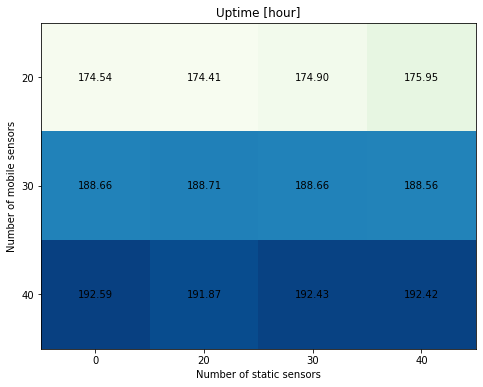

In [12]:
plot_uptimes('./result-single.csv')

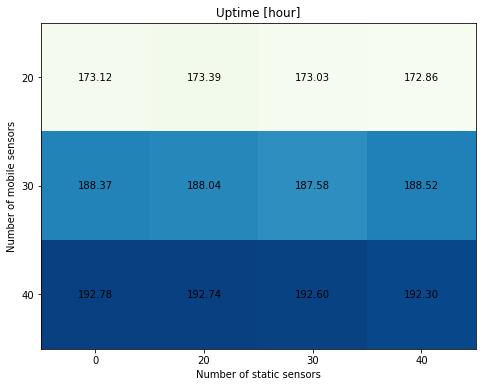

In [13]:
plot_uptimes('./result-multi.csv')